In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
df_bureau = pd.read_csv("bureau_data.csv")
df_cust = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")

In [3]:
df_bureau.shape, df_loans.shape, df_cust.shape

((50000, 8), (50000, 15), (50000, 12))

In [4]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [5]:
df_cust.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [6]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [7]:
df = pd.merge(df_bureau,df_loans,on="cust_id")
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,loan_id,loan_purpose,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,L00001,Auto,...,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,L00002,Home,...,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,L00003,Personal,...,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,L00004,Personal,...,1747000,34940.000,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,L00005,Auto,...,4520000,90400.000,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df = pd.merge(df , df_cust, on="cust_id")
df.head(2)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,loan_id,loan_purpose,...,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,1,1,42,0,0,3,7,L00001,Auto,...,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,3,1,96,12,60,5,4,L00002,Home,...,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   number_of_open_accounts      50000 non-null  int64  
 2   number_of_closed_accounts    50000 non-null  int64  
 3   total_loan_months            50000 non-null  int64  
 4   delinquent_months            50000 non-null  int64  
 5   total_dpd                    50000 non-null  int64  
 6   enquiry_count                50000 non-null  int64  
 7   credit_utilization_ratio     50000 non-null  int64  
 8   loan_id                      50000 non-null  object 
 9   loan_purpose                 50000 non-null  object 
 10  loan_type                    50000 non-null  object 
 11  sanction_amount              50000 non-null  int64  
 12  loan_amount                  50000 non-null  int64  
 13  processing_fee  

In [10]:
df['default'] = df['default'].astype(int)
df['default'].value_counts()

,count
default,
0,45703
1,4297


In [11]:
X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37500, 32), (12500, 32), (37500,), (12500,))

In [13]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [14]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

<h3 align="center" style="color:blue">Data Cleaning</h3>


In [15]:
df_train.isna().sum()

,0
cust_id,0
number_of_open_accounts,0
number_of_closed_accounts,0
total_loan_months,0
delinquent_months,0
total_dpd,0
enquiry_count,0
credit_utilization_ratio,0
loan_id,0
loan_purpose,0


In [16]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [17]:
mode_resident_type = df_train['residence_type'].mode()[0]
mode_resident_type

'Owned'

In [18]:
df_train['residence_type'].fillna(mode_resident_type, inplace=True)


<ipython-input-18-805196d7d77d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna(mode_resident_type, inplace=True)


In [19]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [20]:
df_test['residence_type'].fillna(mode_resident_type, inplace=True)

<ipython-input-20-a8c9c2548186>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['residence_type'].fillna(mode_resident_type, inplace=True)


In [21]:
df_train.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'default'],
      dtype='object')

In [22]:
numerical_cols = ['number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio','sanction_amount','loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application','age','income','number_of_dependants','years_at_current_address']

In [23]:
categorical_cols = ['loan_purpose', 'loan_type','gender', 'marital_status', 'employment_status','residence_type','city', 'state', 'zipcode', 'default']

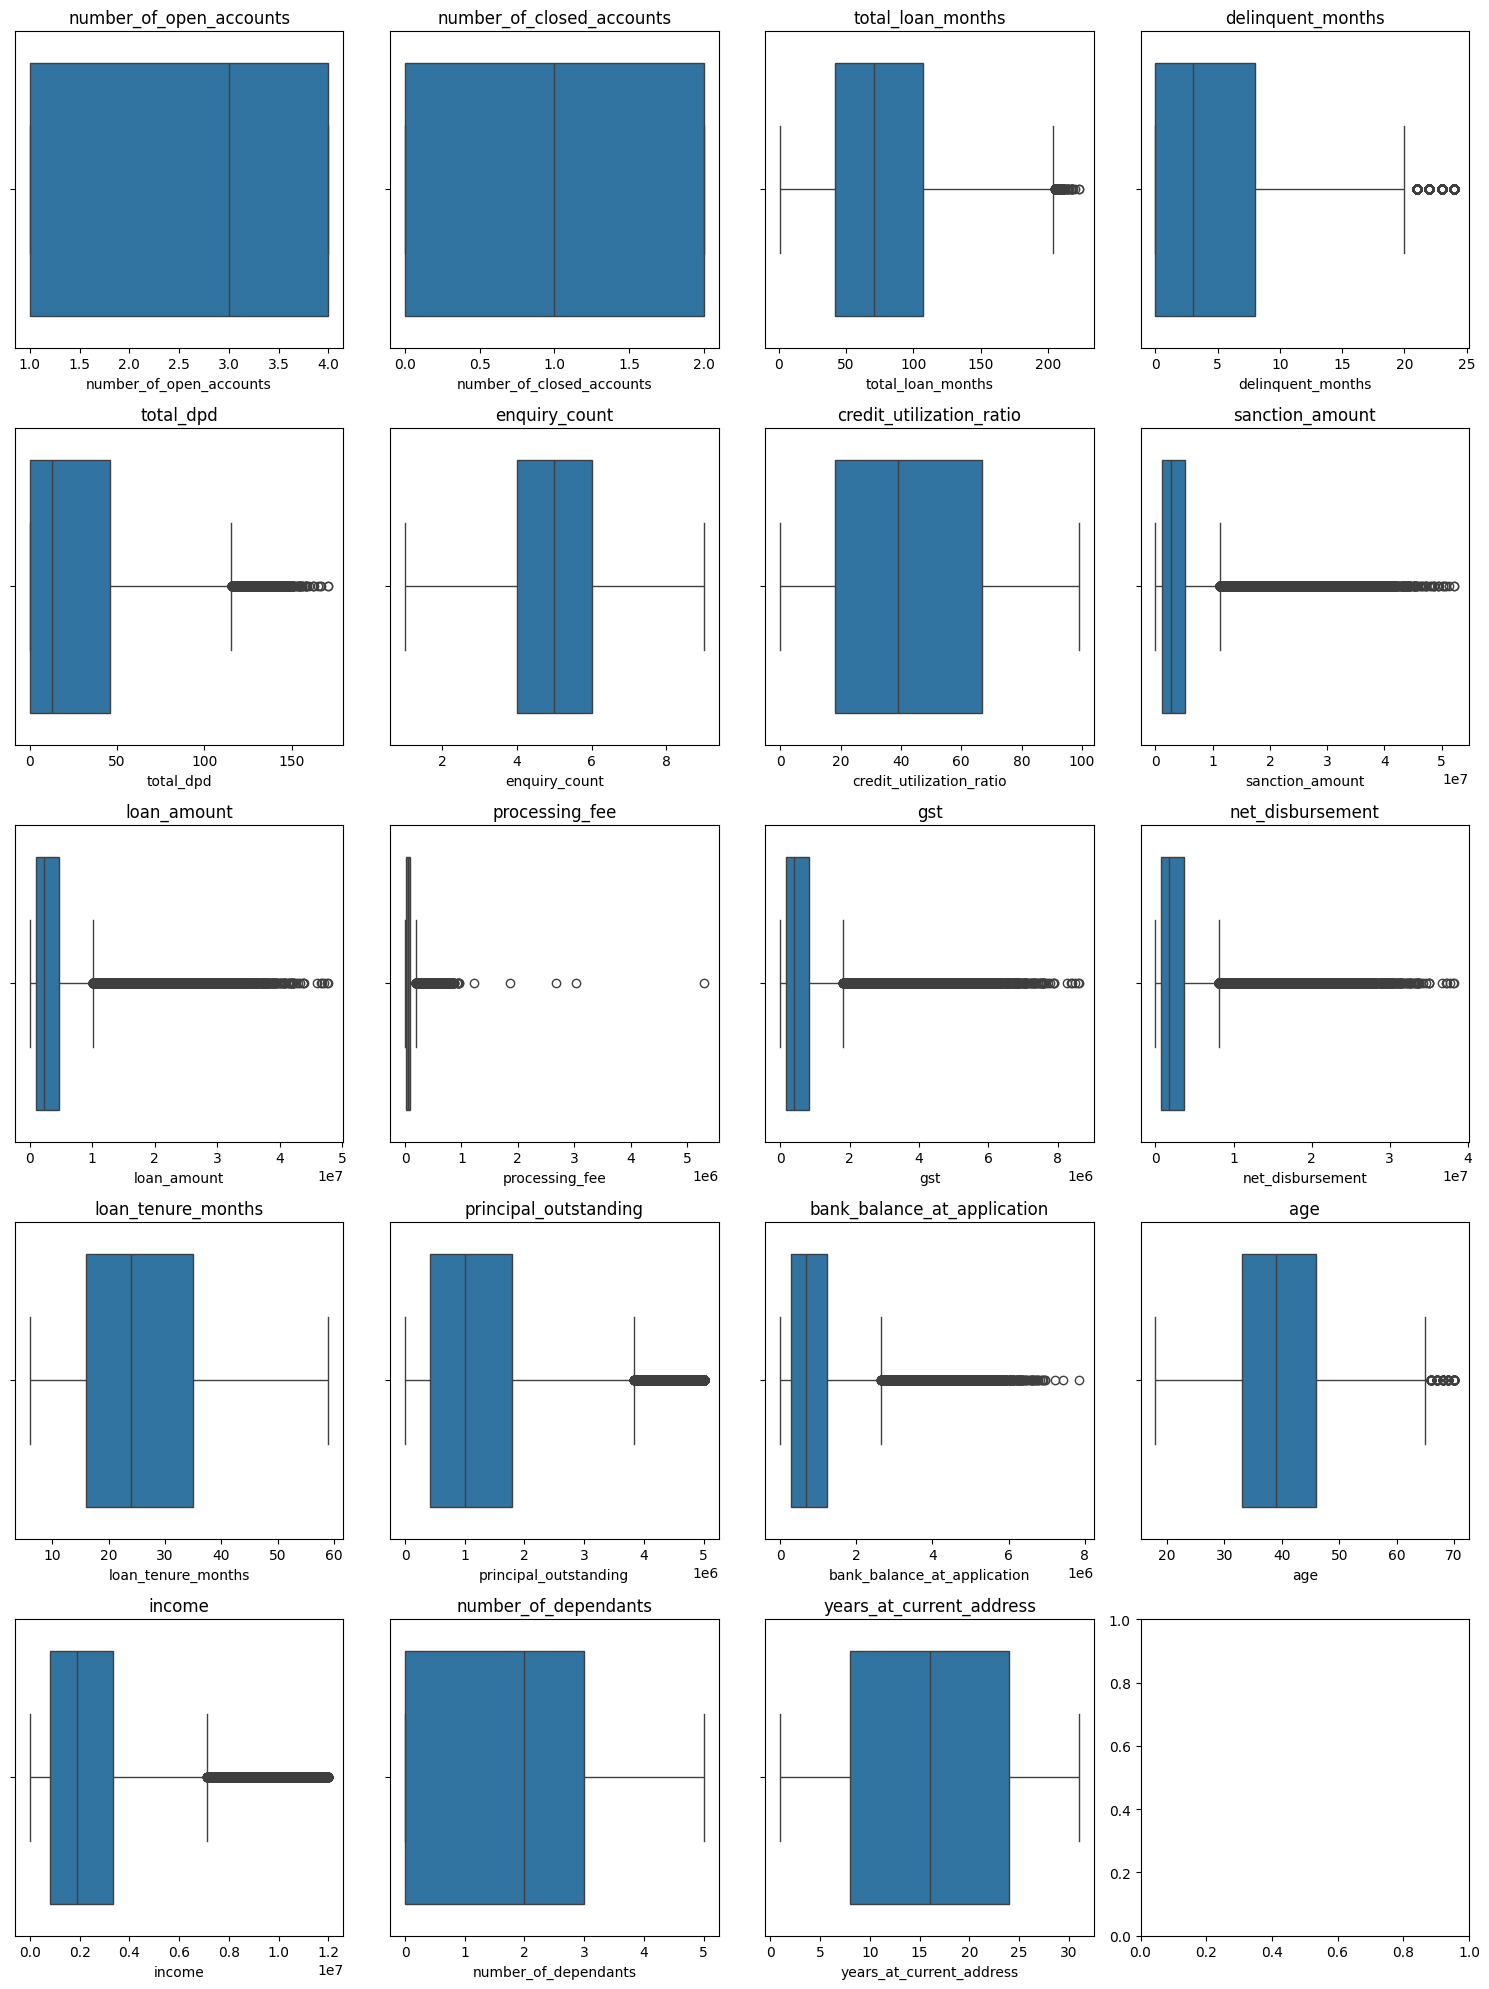

In [24]:
num_plots = len(numerical_cols)
plots_per_row = 4
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < num_plots:
        sns.boxplot(x=df_train[col], ax=axes[i])
        axes[i].set_title(col)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

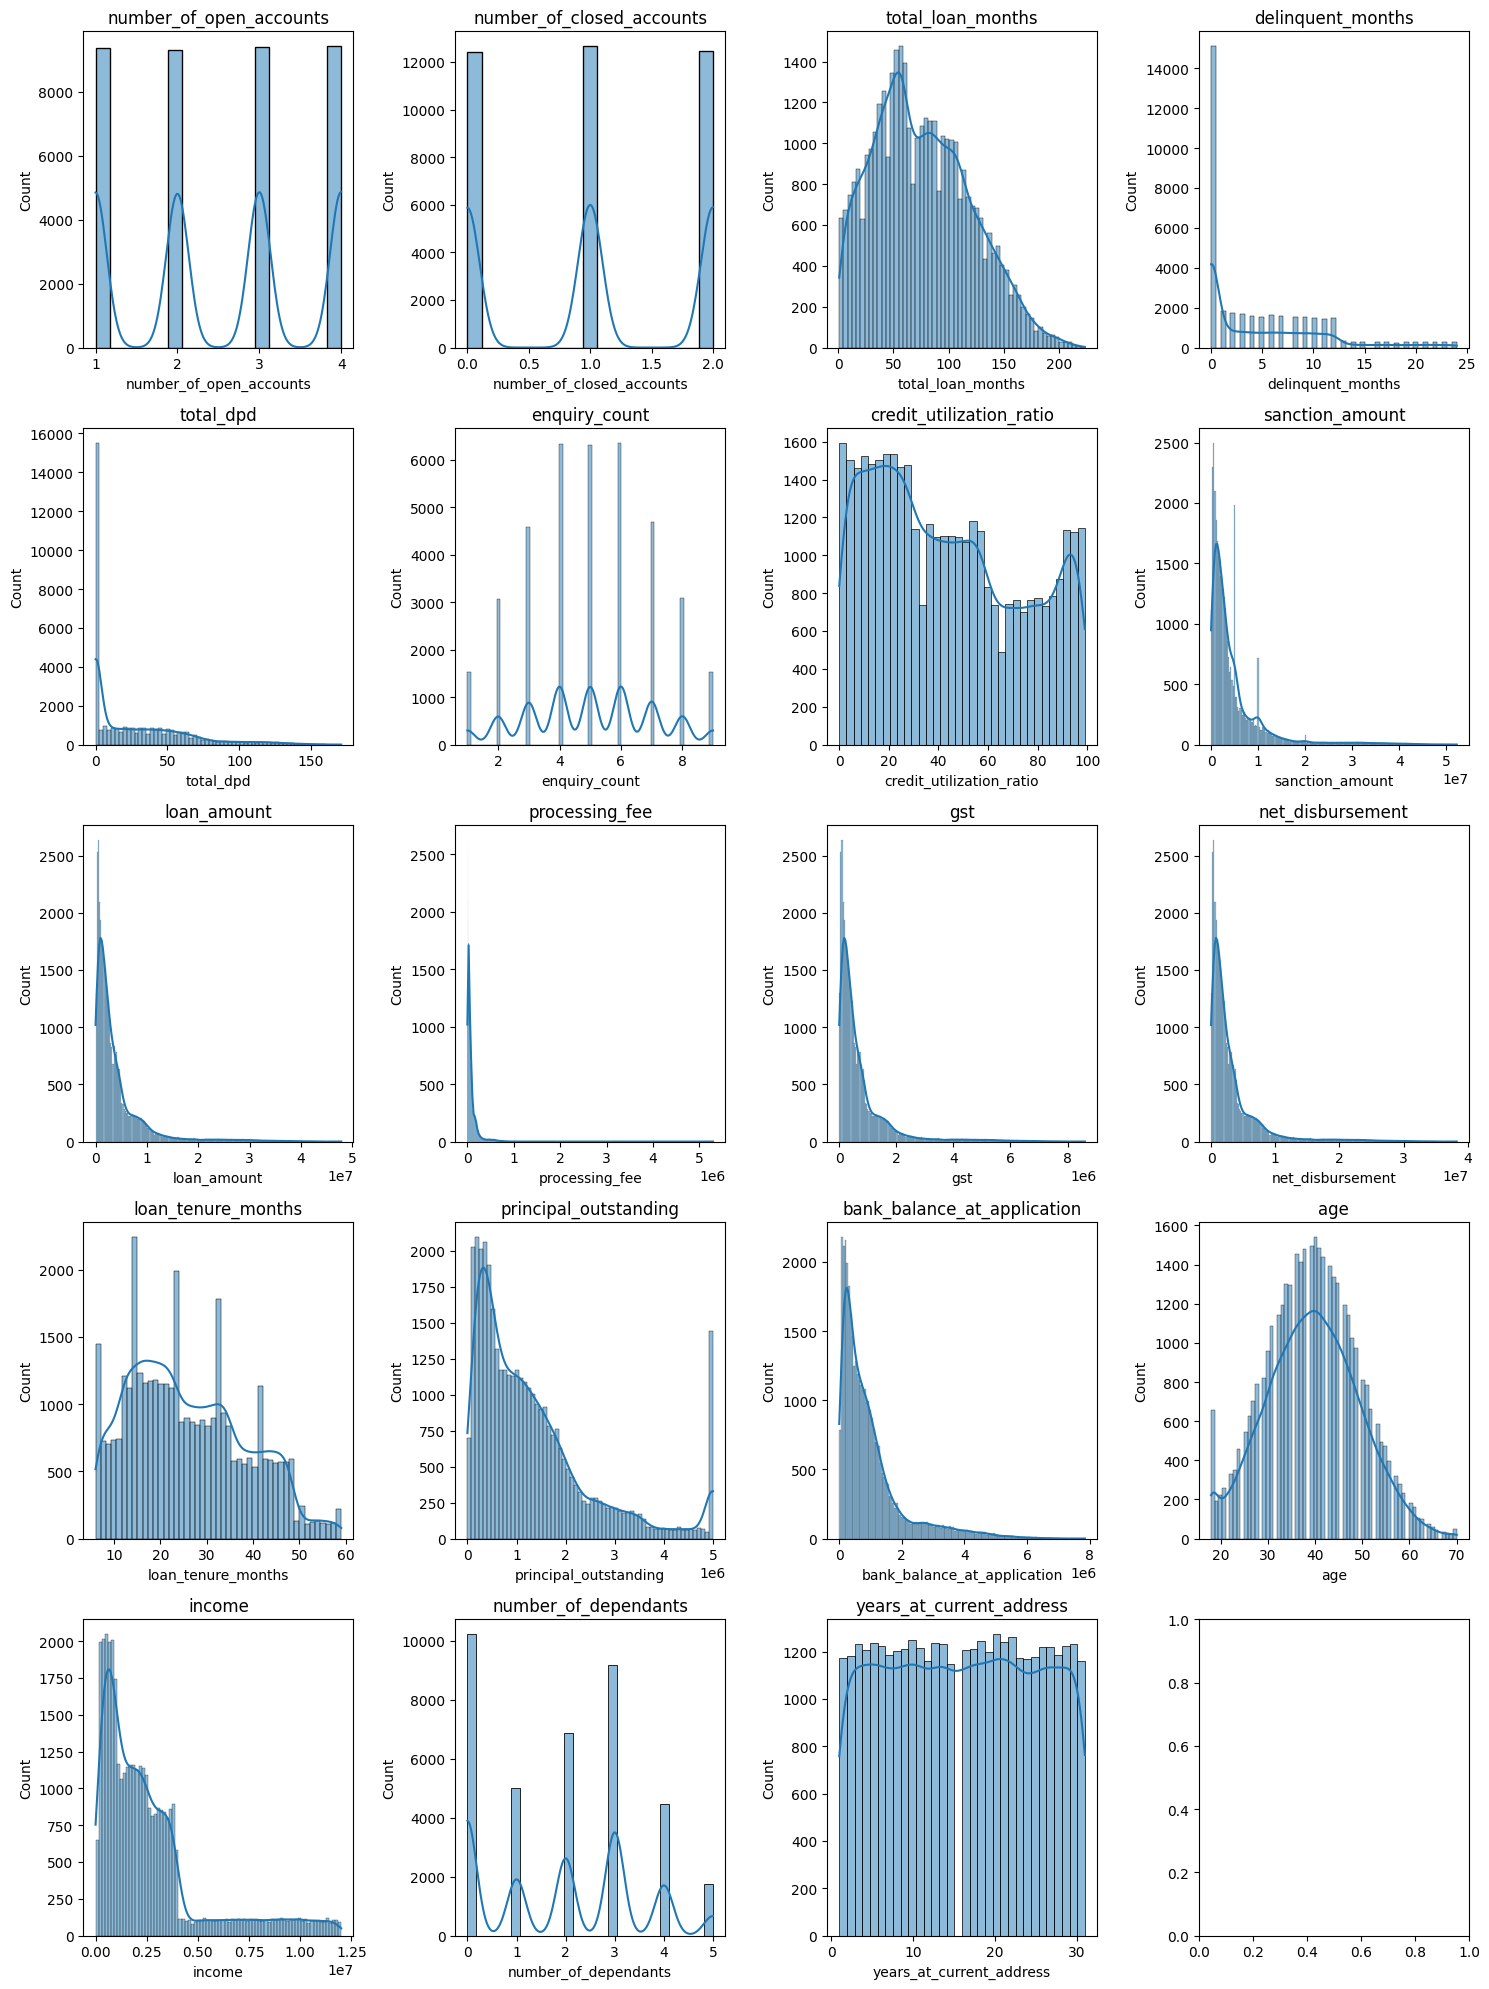

In [25]:
num_plots = len(numerical_cols)
plots_per_row = 4
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < num_plots:
        sns.histplot(x=df_train[col], ax=axes[i], kde=True)
        axes[i].set_title(col)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [26]:
df_train.processing_fee.describe()

,processing_fee
count,37500.000
mean,80290.677
std,113128.140
min,0.000
25%,19220.000
50%,44600.000
75%,92420.000
max,5293543.524


In [27]:
df_train[df_train.processing_fee == df_train.processing_fee.max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
9898,3626000,5293543.524


In [28]:
df_train[df_train.processing_fee >= 0.03*df_train['loan_amount']][['loan_amount','processing_fee']]

,loan_amount,processing_fee
45224,0,0.000
23981,2234000,2669791.023
2278,0,0.000
28174,966000,1214492.673
11092,0,0.000
46640,0,0.000
47089,1738000,1858964.768
29305,2616000,3036378.005
9898,3626000,5293543.524
47428,0,0.000


In [29]:
df_train_1 = df_train[df_train.processing_fee < 0.03*df_train['loan_amount']].copy()

In [30]:
df_test = df_test[df_test.processing_fee < 0.03*df_test['loan_amount']]

In [31]:
df_train_1

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,loan_id,loan_purpose,...,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,default
12746,C12747,4,2,152,20,118,4,36,L12747,Home,...,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,Telangana,500001,0
32495,C32496,3,1,160,10,62,5,5,L32496,Education,...,Single,Salaried,715000,0,Owned,27,Mumbai,Maharashtra,400001,0
43675,C43676,1,1,54,12,67,4,0,L43676,Home,...,Single,Salaried,3195000,0,Mortgage,26,Chennai,Tamil Nadu,600001,0
9040,C09041,3,0,76,0,0,8,87,L09041,Education,...,Married,Salaried,1500000,2,Mortgage,30,Bangalore,Karnataka,560001,0
13077,C13078,1,2,60,0,0,1,71,L13078,Personal,...,Married,Self-Employed,1817000,4,Owned,29,Pune,Maharashtra,411001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,C28516,2,0,40,0,0,5,13,L28516,Personal,...,Single,Self-Employed,2470000,0,Owned,20,Kolkata,West Bengal,700001,0
5558,C05559,1,0,52,14,72,4,44,L05559,Auto,...,Single,Salaried,2472000,0,Rented,26,Kolkata,West Bengal,700001,0
45236,C45237,4,2,130,11,44,6,97,L45237,Home,...,Married,Self-Employed,1329000,4,Owned,10,Pune,Maharashtra,411001,1
49228,C49229,2,1,88,0,0,6,25,L49229,Education,...,Single,Salaried,1274000,2,Owned,26,Chennai,Tamil Nadu,600001,0


In [32]:
for col in categorical_cols:
  print(f"{col} : {df_train_1[col].unique()}")

loan_purpose : ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type : ['Secured' 'Unsecured']
gender : ['M' 'F']
marital_status : ['Married' 'Single']
employment_status : ['Self-Employed' 'Salaried']
residence_type : ['Owned' 'Mortgage' 'Rented']
city : ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state : ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode : [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
default : [0 1]


In [33]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal','Personal')

In [34]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal','Personal')

In [35]:
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [36]:
df_train_1.duplicated().sum()
df_train_1.drop_duplicates(inplace=True)

In [37]:
df_train_1.describe()

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,sanction_amount,loan_amount,processing_fee,...,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,age,income,number_of_dependants,years_at_current_address,zipcode,default
count,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,...,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000
mean,2.503,1.001,76.106,4.844,26.669,5.009,43.427,4700839.549,3997048.656,79940.973,...,3197638.924,25.961,1334055.951,986471.142,39.540,2633699.824,1.945,15.998,418876.240,0.086
std,1.119,0.814,43.771,5.841,32.777,2.029,29.393,6258442.119,5372396.196,107447.924,...,4297916.957,12.448,1213703.219,1043171.435,9.859,2623725.584,1.536,8.921,169029.868,0.280
min,1.000,0.000,1.000,0.000,0.000,1.000,0.000,72000.000,56000.000,1120.000,...,44800.000,6.000,35189.000,19415.000,18.000,100000.000,0.000,1.000,110001.000,0.000
25%,1.000,0.000,42.000,0.000,0.000,4.000,18.000,1143000.000,961750.000,19235.000,...,769400.000,16.000,422385.000,287146.750,33.000,802000.000,0.000,8.000,302001.000,0.000
50%,3.000,1.000,71.000,3.000,13.000,5.000,39.000,2644000.000,2230000.000,44600.000,...,1784000.000,24.000,997718.500,665277.500,39.000,1885500.000,2.000,16.000,400001.000,0.000
75%,4.000,2.000,107.000,8.000,46.000,6.000,67.000,5179500.000,4620000.000,92400.000,...,3696000.000,35.000,1784879.000,1234139.000,46.000,3327000.000,3.000,24.000,560001.000,0.000
max,4.000,2.000,223.000,24.000,171.000,9.000,99.000,52175000.000,47819000.000,956380.000,...,38255200.000,59.000,5000000.000,7846643.000,70.000,11999000.000,5.000,31.000,700001.000,1.000


In [38]:
df_train[df_train["gst"] > 0.2*df_train["loan_amount"]]

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,loan_id,loan_purpose,...,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,default


<h3 align="center" style="color:blue">Exploratory Data Analysis</h3>

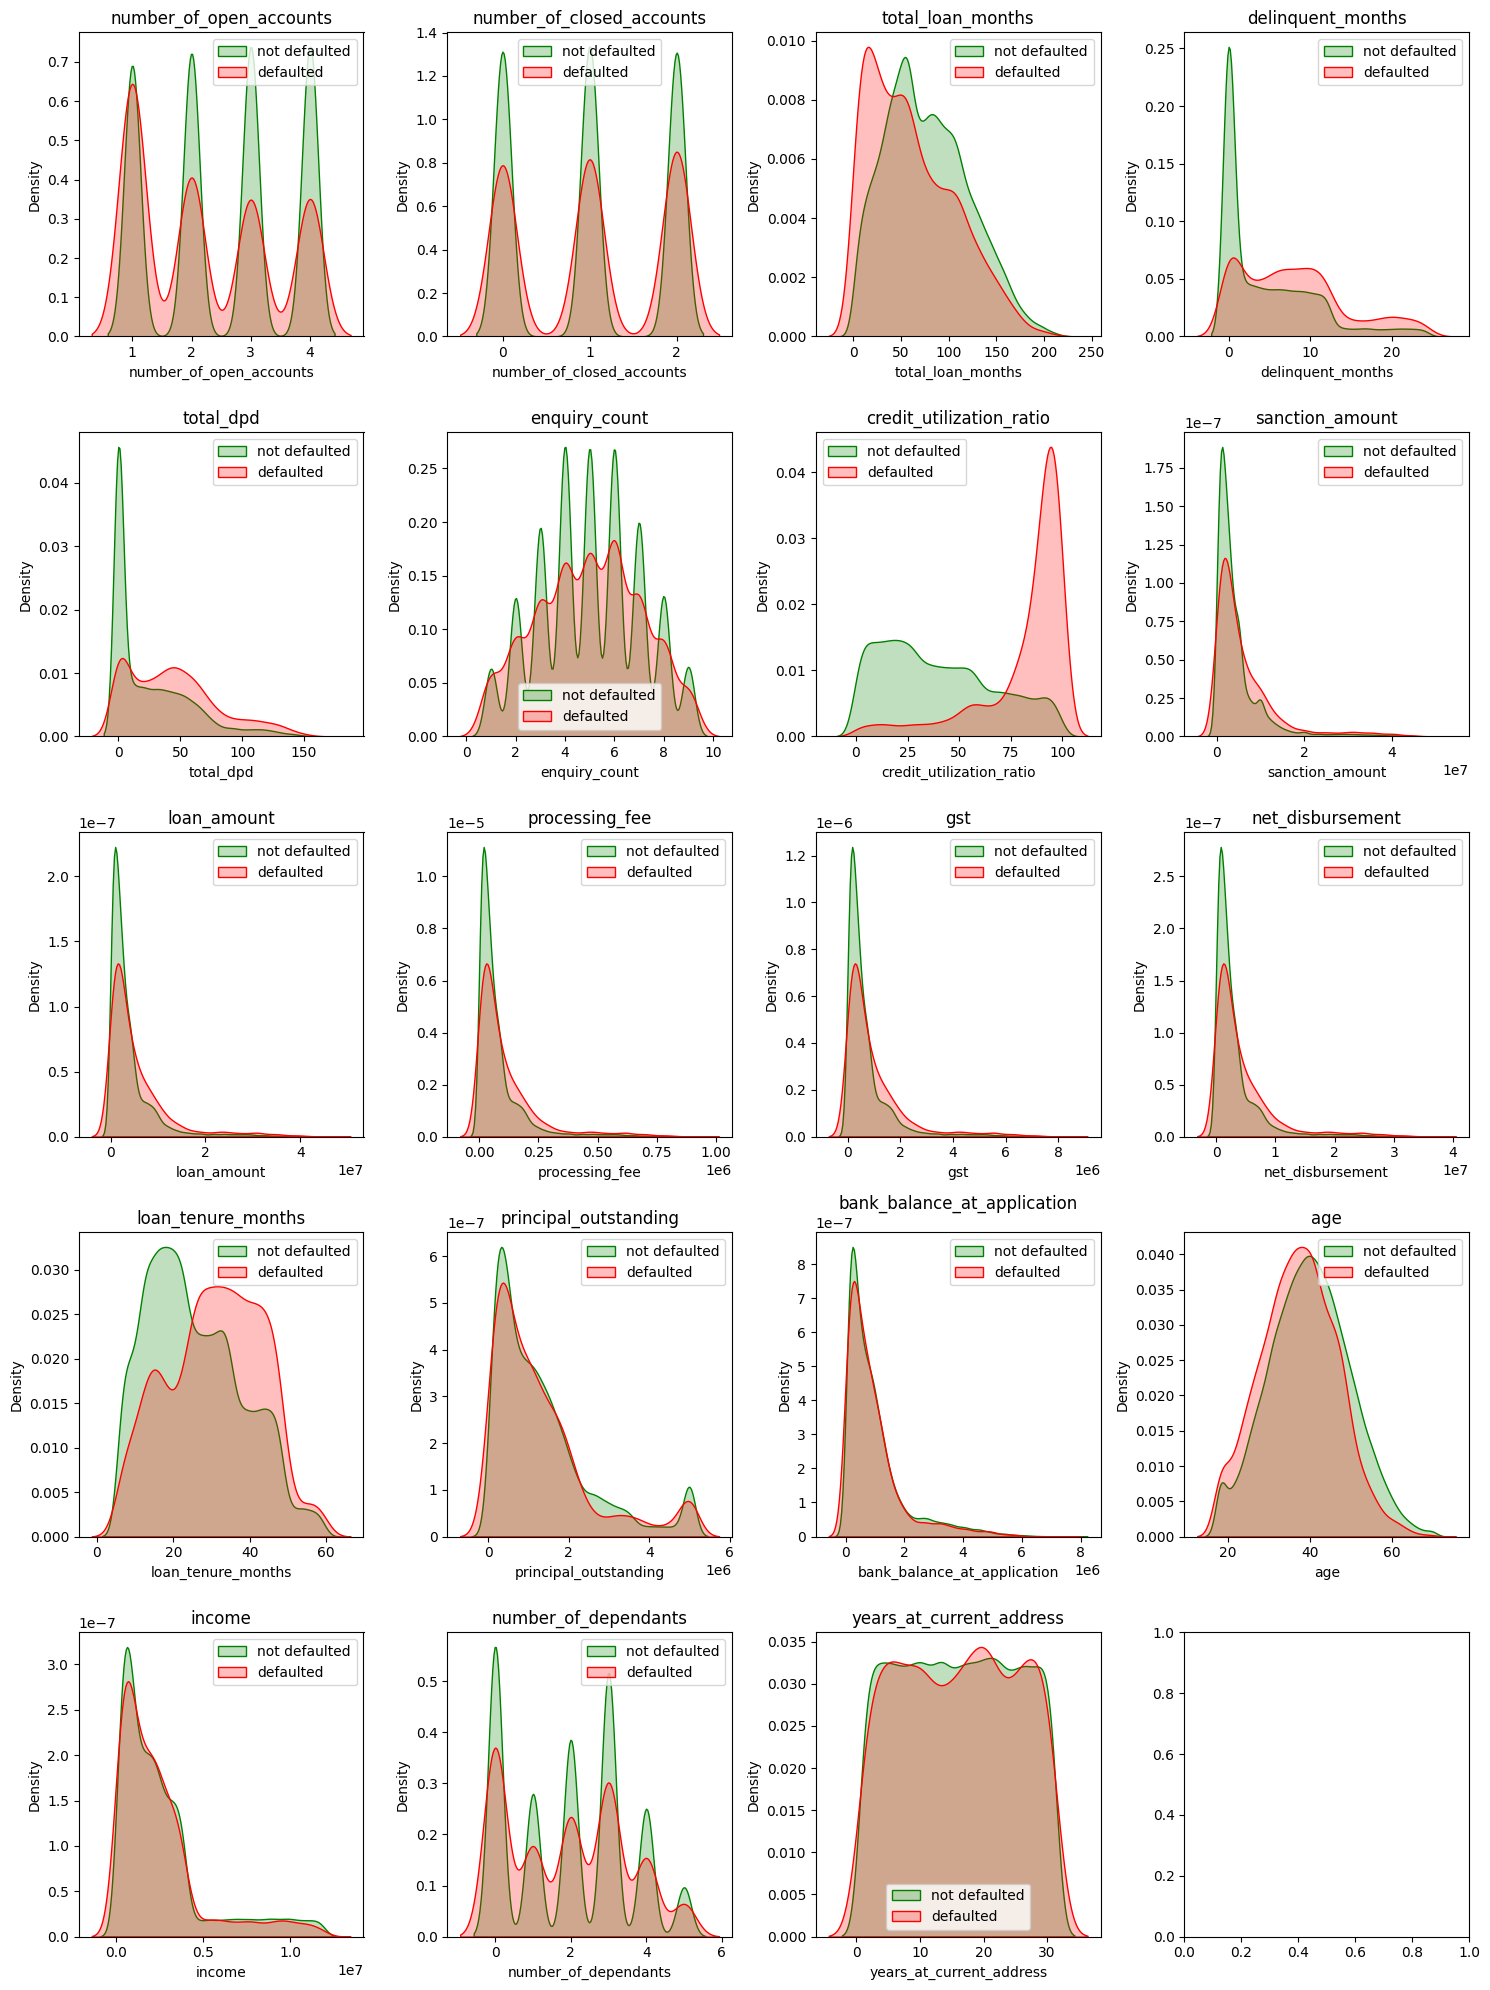

In [39]:
num_plots = len(numerical_cols)
plots_per_row = 4
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < num_plots:
        sns.kdeplot(df_train_1[df_train_1['default'] == 0][col], label="not defaulted", color="green", fill=True, ax=axes[i])
        sns.kdeplot(df_train_1[df_train_1['default'] == 1][col], label="defaulted", color="red", fill=True, ax=axes[i])
        axes[i].set_title(col)
        axes[i].legend()
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Feature Engineering

In [40]:
df_train_1.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'default'],
      dtype='object')

In [41]:
df_train_1['loan_to_income'] = df_train_1['loan_amount'] / df_train_1['income']
df_train_1['loan_to_income'].describe()

,loan_to_income
count,37488.000
mean,1.557
std,0.974
min,0.298
25%,0.769
50%,1.160
75%,2.461
max,4.565


In [42]:
df_test['loan_to_income'] = df_test['loan_amount'] / df_test['income']

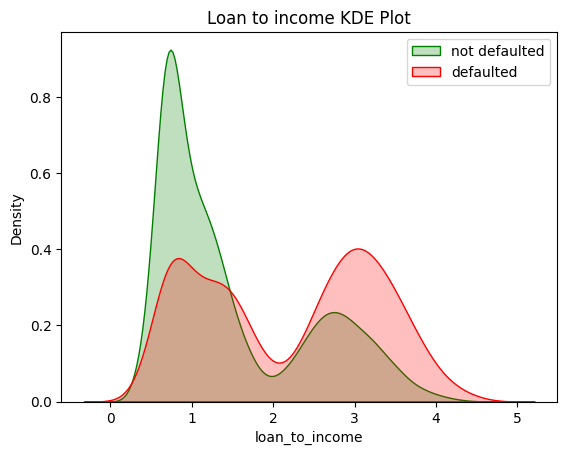

In [43]:
sns.kdeplot(df_train_1[df_train_1['default'] == 0]['loan_to_income'], label="not defaulted", color="green", fill=True)
sns.kdeplot(df_train_1[df_train_1['default'] == 1]['loan_to_income'], label="defaulted", color="red", fill=True)
plt.legend()
plt.title("Loan to income KDE Plot")
plt.show()

In [44]:
df_train_1['Deliquency Ratio'] = df_train_1['delinquent_months'] / df_train_1['total_loan_months']
df_train_1['Deliquency Ratio'].describe()

,Deliquency Ratio
count,37488.000
mean,0.103
std,0.173
min,0.000
25%,0.000
50%,0.037
75%,0.129
max,1.000


In [45]:
df_test['Deliquency Ratio'] = df_test['delinquent_months'] / df_test['total_loan_months']

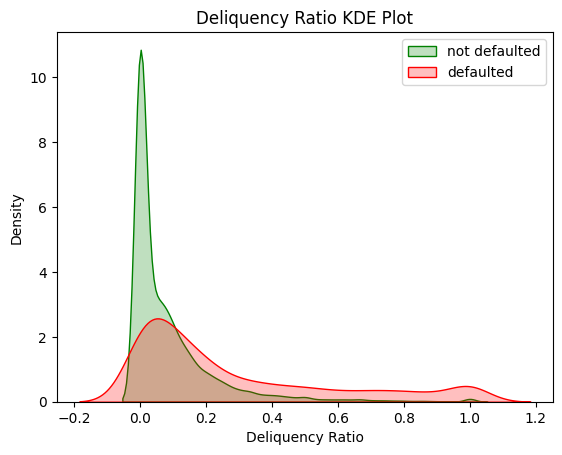

In [46]:
sns.kdeplot(df_train_1[df_train_1['default'] == 0]['Deliquency Ratio'], label="not defaulted", color="green", fill=True)
sns.kdeplot(df_train_1[df_train_1['default'] == 1]['Deliquency Ratio'], label="defaulted", color="red", fill=True)
plt.legend()
plt.title("Deliquency Ratio KDE Plot")
plt.show()

In [47]:
df_train_1['Average DPD per Deliquent Month'] = np.where(
    df_train_1['delinquent_months'] != 0,
    df_train_1['total_dpd'] / df_train_1['delinquent_months'],
    0)
df_train_1['Average DPD per Deliquent Month'].describe()

,Average DPD per Deliquent Month
count,37488.000
mean,3.284
std,2.907
min,0.000
25%,0.000
50%,4.333
75%,5.742
max,10.000


In [48]:
df_train_1['Average DPD per Deliquent Month'].isna().sum()

np.int64(0)

In [49]:
df_test['Average DPD per Deliquent Month'] = np.where(
    df_test['delinquent_months'] != 0,
    df_test['total_dpd'] / df_test['delinquent_months'],
    0)

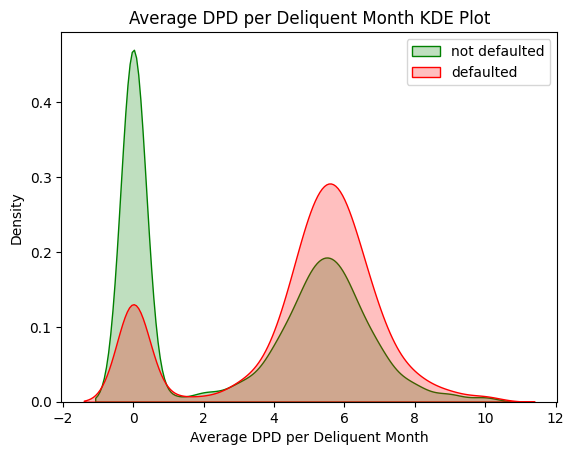

In [50]:
sns.kdeplot(df_train_1[df_train_1['default'] == 0]['Average DPD per Deliquent Month'], label="not defaulted", color="green", fill=True)
sns.kdeplot(df_train_1[df_train_1['default'] == 1]['Average DPD per Deliquent Month'], label="defaulted", color="red", fill=True)
plt.legend()
plt.title("Average DPD per Deliquent Month KDE Plot")
plt.show()

###Feature Selection

In [51]:
df_train_1.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'default', 'loan_to_income',
       'Deliquency Ratio', 'Average DPD per Deliquent Month'],
      dtype='object')

In [52]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'], axis=1)
df_train_2.head(2)

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,loan_purpose,loan_type,sanction_amount,...,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,default,loan_to_income,Deliquency Ratio,Average DPD per Deliquent Month
12746,4,2,152,20,118,4,36,Home,Secured,33121000,...,3,Owned,30,Hyderabad,Telangana,500001,0,2.070,0.132,5.900
32495,3,1,160,10,62,5,5,Education,Secured,1175000,...,0,Owned,27,Mumbai,Maharashtra,400001,0,1.607,0.062,6.200


In [53]:
df_test = df_test.drop(['cust_id', 'loan_id'], axis=1)

In [54]:
df_train_3 = df_train_2.drop(['total_loan_months', 'delinquent_months', 'total_dpd','disbursal_date', 'installment_start_dt','loan_amount','income'], axis=1)

In [55]:
df_test = df_test.drop(['total_loan_months', 'delinquent_months', 'total_dpd','disbursal_date', 'installment_start_dt','loan_amount','income'], axis=1)

In [56]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_open_accounts          37488 non-null  int64  
 1   number_of_closed_accounts        37488 non-null  int64  
 2   enquiry_count                    37488 non-null  int64  
 3   credit_utilization_ratio         37488 non-null  int64  
 4   loan_purpose                     37488 non-null  object 
 5   loan_type                        37488 non-null  object 
 6   sanction_amount                  37488 non-null  int64  
 7   processing_fee                   37488 non-null  float64
 8   gst                              37488 non-null  int64  
 9   net_disbursement                 37488 non-null  int64  
 10  loan_tenure_months               37488 non-null  int64  
 11  principal_outstanding            37488 non-null  int64  
 12  bank_balance_at_app

In [57]:
X_train.select_dtypes(['int64','float64']).columns

Index(['number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application', 'age', 'income',
       'number_of_dependants', 'years_at_current_address', 'zipcode'],
      dtype='object')

In [58]:
X_train = df_train_3.drop(['default'], axis=1)
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = X_train.select_dtypes(['int64','float64']).columns

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [59]:
X_train.describe()

,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,age,number_of_dependants,years_at_current_address,zipcode,loan_to_income,Deliquency Ratio,Average DPD per Deliquent Month
count,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000
mean,0.501,0.501,0.501,0.439,0.089,0.083,0.083,0.083,0.377,0.262,0.124,0.414,0.389,0.500,0.524,0.295,0.103,0.328
std,0.373,0.407,0.254,0.297,0.120,0.112,0.112,0.112,0.235,0.244,0.133,0.190,0.307,0.297,0.286,0.228,0.173,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.375,0.182,0.021,0.019,0.019,0.019,0.189,0.078,0.034,0.288,0.000,0.233,0.325,0.110,0.000,0.000
50%,0.667,0.500,0.500,0.394,0.049,0.046,0.046,0.046,0.340,0.194,0.083,0.404,0.400,0.500,0.492,0.202,0.037,0.433
75%,1.000,1.000,0.625,0.677,0.098,0.096,0.096,0.096,0.547,0.352,0.155,0.538,0.600,0.767,0.763,0.507,0.129,0.574
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [60]:
X_test = df_test.drop(['default'], axis=1)
y_test = df_test['default']
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

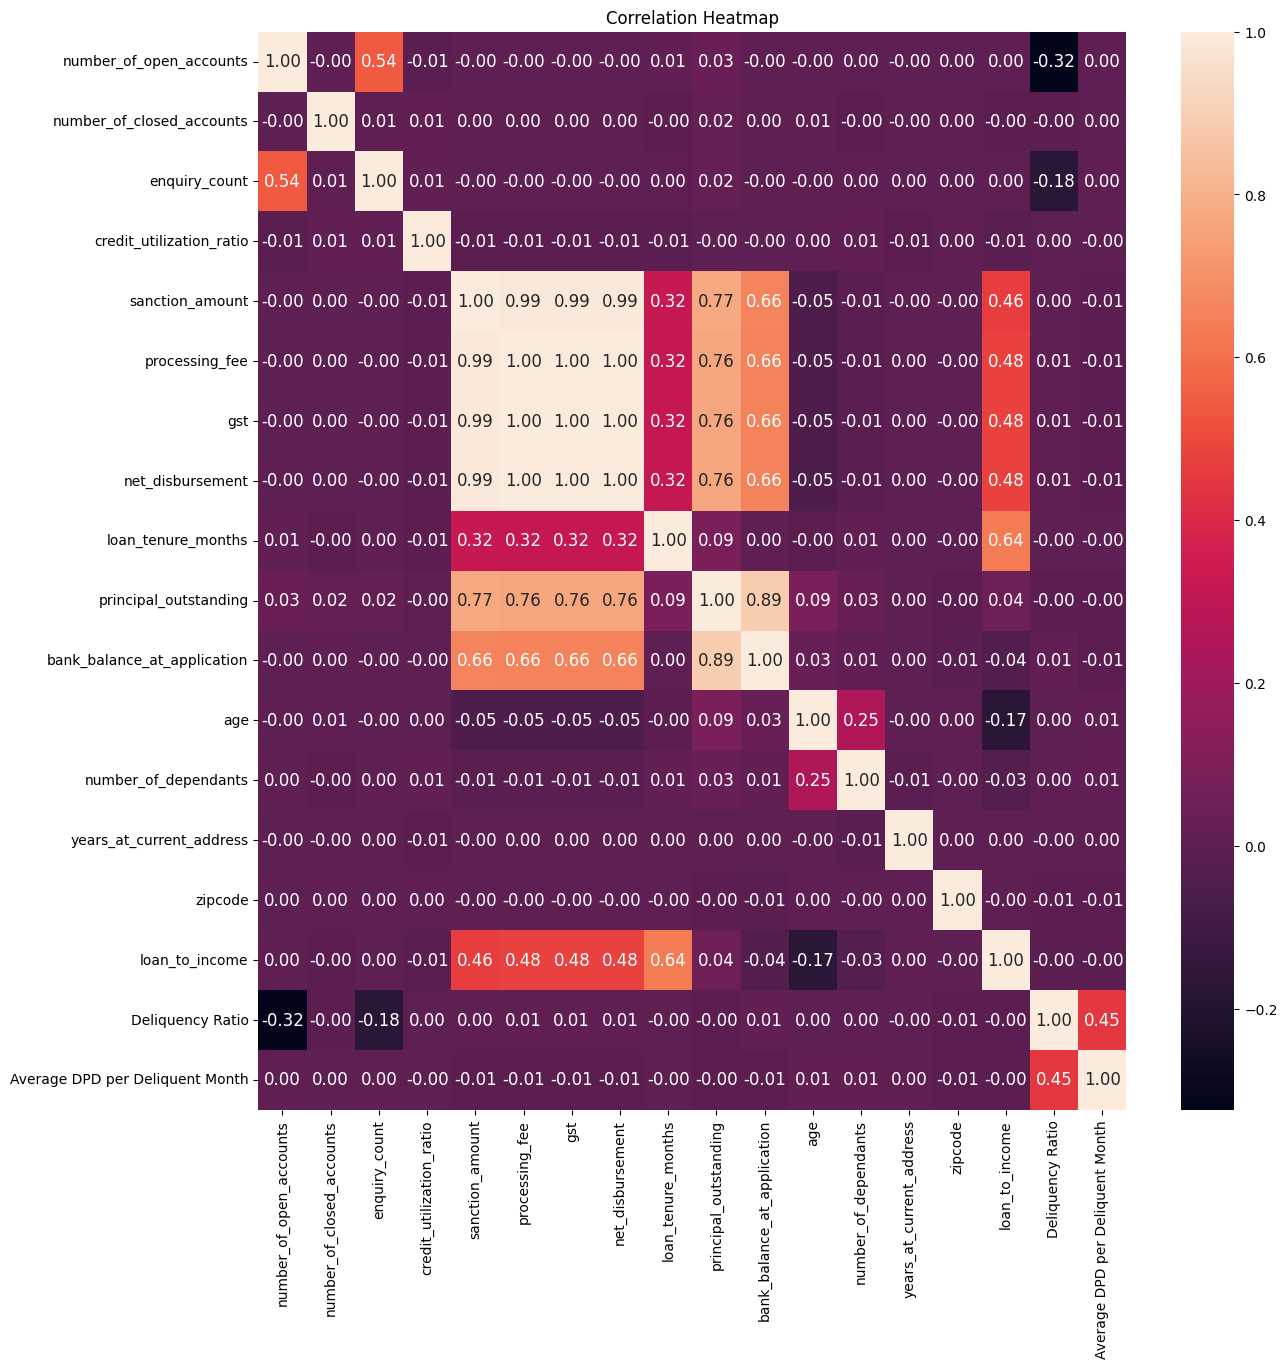

In [61]:
plt.figure(figsize=(14, 14))  # Adjust figure size as needed
sns.heatmap(X_train[cols_to_scale].corr(),
            fmt='.2f',
            annot=True,
            annot_kws={"size": 12})
plt.title('Correlation Heatmap')
plt.show()

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                        for i in range(data.shape[1])]
    return vif_data

In [63]:
calculate_vif(X_train[cols_to_scale])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,number_of_open_accounts,4.386
1,number_of_closed_accounts,2.385
2,enquiry_count,6.410
3,credit_utilization_ratio,2.933
4,sanction_amount,101.087
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.181
9,principal_outstanding,16.326


In [64]:
features_removal_vif = ['processing_fee','gst','net_disbursement','sanction_amount','principal_outstanding']

X_train_1 = X_train.drop(features_removal_vif,axis=1)

calculate_vif(X_train_1[X_train_1.select_dtypes(['int64','float64']).columns])

,feature,VIF
0,number_of_open_accounts,4.353
1,number_of_closed_accounts,2.372
2,enquiry_count,6.384
3,credit_utilization_ratio,2.920
4,loan_tenure_months,6.019
5,bank_balance_at_application,1.805
6,age,5.429
7,number_of_dependants,2.727
8,years_at_current_address,3.404
9,zipcode,3.778


In [65]:
cat_cols = ['loan_purpose', 'loan_type', 'gender', 'marital_status',
       'employment_status', 'residence_type', 'city', 'state', 'zipcode','default']

### Feature Selection using IV and WOE

In [66]:
temp = pd.concat([X_train_1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])['sum'].sum()

np.int64(3223)

In [67]:
def calculate_iv(df, feature, target):
  grouped = df.groupby(feature)['default'].agg(['count','sum'])
  total_good = grouped['sum'].sum()
  total_bad = (grouped['count']-grouped['sum']).sum()
  grouped['good pct'] = (grouped['sum'] / total_good)
  grouped['bad pct'] = ((grouped['count']-grouped['sum'])/total_bad)
  grouped['WOE'] = np.log(grouped['good pct']/grouped['bad pct'])
  grouped['IV'] = grouped['WOE'] * (grouped['good pct'] - grouped['bad pct'])
  total_iv = grouped['IV'].sum()
  return grouped , total_iv

calculate_iv(temp, 'loan_purpose', 'default')

(              count   sum  good pct  bad pct    WOE    IV
 loan_purpose                                             
 Auto           7447   327     0.101    0.208 -0.717 0.076
 Education      5620   559     0.173    0.148  0.161 0.004
 Home          11304  1734     0.538    0.279  0.656 0.170
 Personal      13117   603     0.187    0.365 -0.669 0.119,
 np.float64(0.3691197842282755))

In [68]:
pd.cut(X_train_1['loan_to_income'],bins=10)

,loan_to_income
12746,"(0.4, 0.5]"
32495,"(0.3, 0.4]"
43675,"(0.7, 0.8]"
9040,"(0.1, 0.2]"
13077,"(-0.001, 0.1]"
...,...
28515,"(-0.001, 0.1]"
5558,"(0.1, 0.2]"
45236,"(0.7, 0.8]"
49228,"(0.2, 0.3]"


In [69]:
iv_values = {}

for col in X_train_1.columns:
  if X_train_1[col].dtype == 'object':
    _,iv = calculate_iv(pd.concat([X_train_1, y_train], axis=1), col, 'default')

  else:
    X_binned = pd.cut(X_train_1[col],bins=10,labels=False)
    _,iv = calculate_iv(pd.concat([X_binned, y_train], axis=1), pd.cut(X_train_1[col],bins=10), 'default')
  iv_values[col] = iv
iv_values

<ipython-input-67-70227dea08b5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)['default'].agg(['count','sum'])
<ipython-input-67-70227dea08b5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)['default'].agg(['count','sum'])
<ipython-input-67-70227dea08b5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)['default'].agg(['count','su

{'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.001938089913505351),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_to_income': np.float64(0.475721

In [70]:
iv_value_df = pd.DataFrame(list(iv_values.items()),columns=['feature','iv'])
iv_value_df = iv_value_df.sort_values(by='iv', ascending=False)
iv_value_df


,feature,iv
3,credit_utilization_ratio,2.353
19,Deliquency Ratio,0.717
18,loan_to_income,0.476
20,Average DPD per Deliquent Month,0.402
4,loan_purpose,0.369
13,residence_type,0.247
6,loan_tenure_months,0.219
5,loan_type,0.163
8,age,0.089
0,number_of_open_accounts,0.085


In [71]:
# selected_features_iv = [feature for feature,iv in iv_values.items() if iv > 2]
selected_features_iv = []

for feature, iv in iv_values.items():
  if (iv > 0.02):
    selected_features_iv.append(feature)

selected_features_iv

['number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'age',
 'residence_type',
 'loan_to_income',
 'Deliquency Ratio',
 'Average DPD per Deliquent Month']

### Feature Encoding

In [72]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [73]:
X_train_reduced.head(3)

,number_of_open_accounts,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,age,residence_type,loan_to_income,Deliquency Ratio,Average DPD per Deliquent Month
12746,1.000,0.364,Home,Secured,0.415,0.788,Owned,0.415,0.132,0.590
32495,0.667,0.051,Education,Secured,0.830,0.500,Owned,0.307,0.062,0.620
43675,0.000,0.000,Home,Secured,0.491,0.385,Mortgage,0.759,0.222,0.558


In [74]:
X_test_reduced.sample(3)

,number_of_open_accounts,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,age,residence_type,loan_to_income,Deliquency Ratio,Average DPD per Deliquent Month
43496,0.333,0.222,Home,Secured,0.547,0.519,Rented,0.605,0.192,0.410
13580,0.667,0.010,Home,Secured,0.472,0.423,Mortgage,0.680,0.027,0.200
8049,0.667,0.717,Home,Secured,0.698,0.423,Owned,0.588,0.190,0.536


In [75]:
X_train_encoded = pd.get_dummies(X_train_reduced,drop_first=True,dtype=int)
X_test_encoded = pd.get_dummies(X_test_reduced,drop_first=True,dtype=int)

### Model Training

### Attempt 1
1. Try Logistic Regression, RandomForestClassifier and XGBoostClasifier.
2. No class imbalance

In [76]:
y_train.value_counts()

,count
default,
0,34265
1,3223


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)
y_preds = model.predict(X_test_encoded)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)
y_preds = model.predict(X_test_encoded)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [79]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)
y_preds = model.predict(X_test_encoded)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.83      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.97     12497



In [80]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best Score: 0.7571424666678884
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [81]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 10.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
Best Score: 0.7876453902026391
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.82      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.96      0.96      0.96     12497



### Attempt 2
1. RandomForest, Logistic Regression and XGBoostClasifier
2. handling class imbalance with under sampling

In [82]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

,count
default,
0,3223
1,3223


In [83]:
model = RandomForestClassifier()
model.fit(X_train_res, y_train_res)
y_preds = model.predict(X_test_encoded)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11423
           1       0.53      0.97      0.69      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.94      0.82     12497
weighted avg       0.96      0.92      0.93     12497



In [84]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
y_preds = model.predict(X_test_encoded)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [85]:
model = XGBClassifier()
model.fit(X_train_res, y_train_res)
y_preds = model.predict(X_test_encoded)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11423
           1       0.56      0.96      0.71      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 3
1. Logistic regression and XGboostCasifier
2. Handling clas imbalance with over sampling

In [86]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

,count
default,
0,34197
1,34197


In [87]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)
y_preds = model.predict(X_test_encoded)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [88]:
model = XGBClassifier()
model.fit(X_train_smt, y_train_smt)
y_preds = model.predict(X_test_encoded)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.74      0.84      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [89]:
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_smt, y_train_smt)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': np.float64(4.281332398719396)}
Best Score: 0.9467944906492435
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [90]:
# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_smt, y_train_smt)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 0.5, 'reg_alpha': 0.01, 'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.9786088442528733
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.73      0.82      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



### Attempt 4
1. Handling class imbalance with over sampling.
2. Using logistic regression and xgboostclassifier using optuna library.

In [91]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.8 MB/s eta 0:00:00


In [92]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [93]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-04-29 09:49:19,715] A new study created in memory with name: no-name-6ea9c7ea-4da7-415c-ac4c-bbca780297b5
[I 2025-04-29 09:49:20,196] Trial 0 finished with value: 0.9421437274859187 and parameters: {'C': 15.666284305655646, 'solver': 'newton-cg', 'tol': 0.004095612409945197, 'class_weight': None}. Best is trial 0 with value: 0.9421437274859187.
[I 2025-04-29 09:49:21,165] Trial 1 finished with value: 0.9429479072706889 and parameters: {'C': 0.18478909157830595, 'solver': 'lbfgs', 'tol': 9.296673866722684e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9429479072706889.
[I 2025-04-29 09:49:23,343] Trial 2 finished with value: 0.9457961540475969 and parameters: {'C': 1.4302327660279497, 'solver': 'saga', 'tol': 0.0022110796944568964, 'class_weight': None}. Best is trial 2 with value: 0.9457961540475969.
[I 2025-04-29 09:49:24,090] Trial 3 finished with value: 0.8278433438395224 and parameters: {'C': 0.00013009070738132, 'solver': 'lbfgs', 'tol': 5.299193448079467e

In [94]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score macro avg for trained data: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score macro avg for trained data: 0.9459147506396501
  Params: 
    C: 2.718088662192292
    solver: saga
    tol: 0.0005426666435158816
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [95]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-04-29 09:50:32,512] A new study created in memory with name: no-name-13d85488-b3d0-4ec5-9664-223413210899
[I 2025-04-29 09:50:36,832] Trial 0 finished with value: 0.9348881584319946 and parameters: {'lambda': 0.0050235419257414924, 'alpha': 0.017007136967079277, 'subsample': 0.9652215388998763, 'colsample_bytree': 0.4064149039273286, 'max_depth': 3, 'eta': 0.16161398905316843, 'gamma': 0.9178563307248766, 'scale_pos_weight': 5.750462836748699, 'min_child_weight': 10, 'max_delta_step': 4}. Best is trial 0 with value: 0.9348881584319946.
[I 2025-04-29 09:50:40,585] Trial 1 finished with value: 0.9660787125028601 and parameters: {'lambda': 0.004498292215694063, 'alpha': 0.04728561828524632, 'subsample': 0.8218915256218473, 'colsample_bytree': 0.7597582042637188, 'max_depth': 10, 'eta': 0.27366113586532304, 'gamma': 7.767907370962318, 'scale_pos_weight': 5.605808711379346, 'min_child_weight': 4, 'max_delta_step': 5}. Best is trial 1 with value: 0.9660787125028601.
[I 2025-04-29 09:

In [96]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score macro avg for trained data: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score macro avg for trained data: 0.974988705656461
  Params: 
    lambda: 0.3134326981022036
    alpha: 0.015311761848639334
    subsample: 0.9843765139646945
    colsample_bytree: 0.7907072795462977
    max_depth: 10
    eta: 0.24271608400819816
    gamma: 0.5014052004451521
    scale_pos_weight: 5.002091233253897
    min_child_weight: 8
    max_delta_step: 8
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11423
           1       0.67      0.87      0.76      1074

    accuracy                           0.95     12497
   macro avg       0.83      0.92      0.87     12497
weighted avg       0.96      0.95      0.95     12497



### Model evalution using ROC, AUC and gini coefficient

In [97]:
best_model = best_model_logistic

In [98]:
from sklearn.metrics import roc_curve

probabilities = best_model.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9836891853493662)

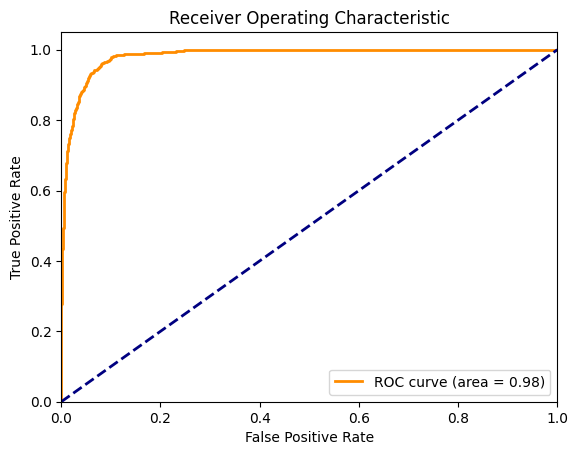

In [99]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [100]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

#if AUC of 0.98: The model is very good at distinguishing between events and non-events.

#if Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

#The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.



AUC: 0.9836891853493662
Gini Coefficient: 0.9673783706987324


### Model evaluation using Rank ordering and KS Statics

In [101]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})

df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')

df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),
}))
df_decile.reset_index(inplace=True)

<ipython-input-101-2ac8461b4484>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


In [102]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])

In [103]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)

df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()

df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()

df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])

df_decile

#If KS is in top 3 decile and score above 40, it is considered a good predictive model.
#If The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile.
#To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank #ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

#KS values of 30–70 are okay.

#Above 80 is considered excellent.

#And if it’s high in the first 3 deciles, it shows strong early separation, which is ideal for decision-making.



#Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

#Events and Non-Events terms are interchanged based on usecase to usecase.

#eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be #non-events (bad).

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.819,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082,80.531
1,8,0.217,0.818,161.000,1089.000,12.880,87.120,1059.000,1441.000,98.603,12.615,85.988
2,7,0.030,0.217,10.000,1239.000,0.801,99.199,1069.000,2680.000,99.534,23.461,76.073
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


###The highest **KS value is 86.09%**, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile.

### Exporting Model

In [107]:
from joblib import dump

model_data = {
    'model':best_model,
    'features':X_train_encoded.columns,
    'scaler':scaler,
    'cols_to_scale':cols_to_scale
}

dump(model_data,'model_data.joblib')

['model_data.joblib']

In [108]:
best_model.coef_, best_model.intercept_

(array([[ 1.17256301, 15.8436042 ,  0.60872526, -0.069016  , 17.10471836,
         13.64603558,  2.03983377,  1.01742067, -3.34511435,  1.03974882,
          1.03974882, -1.83228546,  1.84465793]]),
 array([-20.61120002]))